***
***
# <div align="center"><font color='darkred'><b></b></font></div>
***
# <div align="center"><font color='indigo'><b></b></font></div>
***
# <div align="center"><font color='indigo'><b></b></font></div>
***
# <div align="center"><font color='darkred'><b>LINEAR REGRESSION</b></font></div>
***
***

### IMPORTING THE REQUIRED LIBRARIES

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### LINEAR REGRESSION CLASS

In [2]:
class LINEAR_REGRESSION():
    def __init__(self,x):                                      # CLASS CONSTRUCTOR: IT WILL CREATE
        self.theta=np.random.random(size=(1,x.shape[1]+1))     # WITH SHAPE 1*d+1
        self.previous_theta=np.zeros(shape=(1,x.shape[1]+1))   # FOR OTHER STOPPING CRITERIA
    
    def One_Adder(self,x):                                     # FUNCTION FOR APPENDING ONES TO X
        return np.hstack((x,np.ones((x.shape[0],1))))
    
    def Loss_Plotter(self,loss):                               # FUNCTION FOR GENERATING GRAPH OF LOSS DURING TRAINING
        plt.plot(loss)
        plt.xlabel('Epochs')
        plt.ylabel('MSE loss')
        plt.show()
    
    def Get_Weights(self):                                    # FUNCTION FOR RETURNING THETA
        return self.theta
    
    def Hypothesis(self,x,theta):                             # HYPOTHESIS FUNCTION THAT RETURNS y=mx+c FOR MULTIPLE XFEATURES
        return np.dot(x,theta.reshape(-1,1))
        
    def Cost_Function(self,x,y,theta):                        # FUNCTION THAT RETURNS THE COST/LOSS
        hypothesis=self.Hypothesis(x,theta)
        return np.mean((y-hypothesis)**2)
    
    def Derivative_Cost_Function(self,x,y,theta):             # FUNCTION THAT RETURNS THE SUM OF DERIVATIVES
        hypothesis=self.Hypothesis(x,theta)
        return -2*np.mean((y-hypothesis)*x,axis=0)
    
    def Gradient_Descent(self,theta,derivative,learning_rate=0.01):   # FUNCTION FOR UPDATING THETA
        return theta-(learning_rate*derivative)
    
    
    def Train(self,x,y,learning_rate=0.01,max_iterations=0,print_loss_after=10):      # TRAINING FUNCTION
        x=self.One_Adder(x)                                                           # APPENDING ONES
        loss=[]                                                                       # FOR STORING LOSS
        if max_iterations>0:                                                          # IF MAX ITERATIONS ARE GIVEN
            for i in range(max_iterations):                                        
                derivative=self.Derivative_Cost_Function(x,y,self.theta)               # GET DERIVATIVE
                self.theta=self.Gradient_Descent(self.theta,derivative,learning_rate) # UPDATE THETA
                loss.append(self.Cost_Function(x,y,self.theta))                       # APPEND LOSS
                
                if np.any(np.isnan(self.theta)) or np.any(np.isinf(self.theta)):      # CHECKING FOR INVALID VALUES
                    print("\n\n\n Learning rate too high resulting in Nan and inf values")
                    break
                if  i%print_loss_after==0:       
                    cost=self.Cost_Function(x,y,self.theta)                                # PRINT LOSS
                    print(f'epoch {i} loss = {cost}')
        else:                                                                       # IF MAX ITERATIONS ARE NOT GIVEN THEN
            i=0                                                                     # COUNTER FOR KEEPING TRACK OF ITERATION NO.
            threshold=0.07                                                          # RANDOM THRESHOLD
            while not np.array_equal(self.theta, self.previous_theta):              # STOPPING CITERIA: THETA = PRECIOUS THETA
                derivative=self.Derivative_Cost_Function(x,y,self.theta)             # GET DERIVATIVE
                self.previous_theta=self.theta                                      # UPDATE PREVIOUS THETA
                self.theta=self.Gradient_Descent(self.theta,derivative,learning_rate) # UPDATE THETA
                loss.append(self.Cost_Function(x,y,self.theta))                       # APPEND LOSS
                
                if np.any(np.isnan(self.theta)) or np.any(np.isinf(self.theta)):     # CHECKING FOR INVALID VALUES
                    print("\n\n\n Learning rate too high resulting in Nan and inf values")
                    break
                    
                if np.any(np.linalg.norm(self.theta) < threshold):                  # STOPPING CRITERIA:SELF DEFINED THRESHOLD
                    print('threshold reached')
                    break
                    
                if  i%print_loss_after==0:       
                    cost=self.Cost_Function(x,y,self.theta)                              # PRINT LOSS
                    print(f'epoch {i} loss = {cost}')     
                i=i+1                                                               # INCREMENT COUNTER 
                 
            print("Selected weights are ",self.Get_Weights())                       # PRINT SELECTED WEIGHTS AND PLOT THEM
        self.Loss_Plotter(loss)
            
            
    def Predict(self,x):                                                           # FUNCTION TO PREDICT THE VALUES
        x = self.One_Adder(x)                                                      # APPEND ONES TO X
        choosen_weights=self.Get_Weights()                                         # GET WEIGHTS
        return self.Hypothesis(x,choosen_weights)                                  # RETURN HYPOTHESIS OF WEIGHTS -> y=mx+c     


### CALLING CLASS FUNCTIONS FOR RANDOM DATA

epoch 0 loss = 0.6109958823255768
epoch 99 loss = 0.06578547463925523
epoch 198 loss = 0.06334729890390617


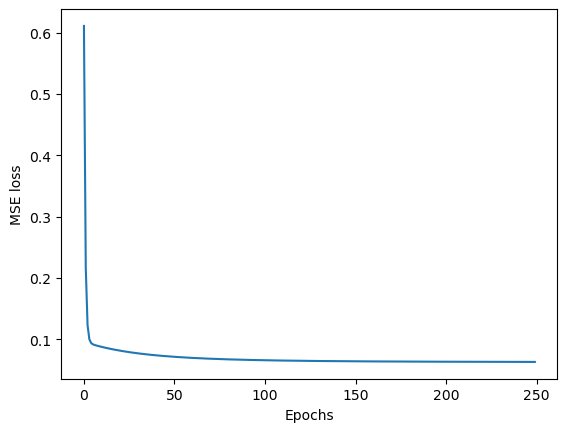

Updated weights after training are [[ 0.01758329 -0.03984147  0.01178559  0.02756776 -0.12822943  0.12741713
  -0.10703321 -0.0854006   0.57216217]]
Predictions are [0.51284744 0.41181248 0.45308271 0.63297656 0.45573232 0.42730353
 0.61752577 0.4341334  0.37580118 0.60014681 0.55912473 0.4657359
 0.45849431 0.43471569 0.55936969 0.52913854 0.2944859  0.57828915
 0.50633808 0.57109481 0.41790935 0.42278519 0.53586338 0.51404184
 0.41130406 0.4273666  0.53061582 0.52613753 0.52392092 0.53555365
 0.44646468 0.64300254 0.39242815 0.57751759 0.39561415 0.52107176
 0.54618088 0.47795497 0.53959929 0.49935341 0.46838278 0.44232223
 0.50425119 0.42623525 0.35743516 0.47655803 0.54286844 0.55253588
 0.50003385 0.54575794 0.46156737 0.45682731 0.57772905 0.41936412
 0.56172583 0.45434582 0.49766256 0.52942503 0.62468666 0.55937876
 0.54689843 0.58160782 0.48587423 0.47722787 0.45539147 0.47165821
 0.48209393 0.4883565  0.53254975 0.43004959 0.56121538 0.57345982
 0.50385873 0.40206609 0.4890441

In [3]:
x=np.random.random(size=(100,8))                                                     # GENERATING RANDOM X AND Y 
y=np.random.random(size=(100,1)) 
# y=(x[:,0]**2).reshape(-1,1)
obj=LINEAR_REGRESSION(x)                                                            # CREATING LINEAR REGRESSION CLASS OBJECT
obj.Train(x,y,learning_rate=0.09,max_iterations=250,print_loss_after=99)                              # TRAINING WITHOUT MAX ITERATIONS
print('Updated weights after training are',obj.Get_Weights())                       # GETTING WEIGHTS 
print('Predictions are',obj.Predict(x).ravel(),'\n\n Actual Y is',y.ravel())        # PREDICTING ON X

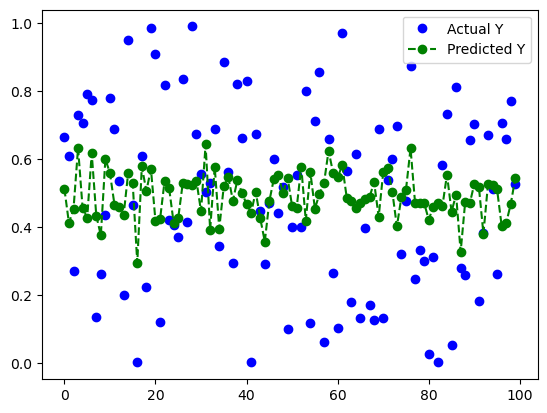

In [4]:
plt.plot(y,'bo')
plt.plot(obj.Predict(x),'go--')
plt.legend(['Actual Y','Predicted Y'])

### CALLING CLASS FUNCTIONS FOR REAL ESTATE DATASET

epoch 0 loss = 1.6331839632212015
epoch 99 loss = 0.5608205651971977
epoch 198 loss = 0.4838441475690512
epoch 297 loss = 0.4534219369236624
epoch 396 loss = 0.43730144225494455
epoch 495 loss = 0.4284693557479115
epoch 594 loss = 0.42360528808157677
epoch 693 loss = 0.42092410226456867
epoch 792 loss = 0.41944593387920737
epoch 891 loss = 0.418630979202481
epoch 990 loss = 0.41818167003242906
epoch 1089 loss = 0.41793395205495387
epoch 1188 loss = 0.4177973774837251
epoch 1287 loss = 0.41772207970230285
epoch 1386 loss = 0.41768056570836337
epoch 1485 loss = 0.417657677760508
epoch 1584 loss = 0.4176450589274968
epoch 1683 loss = 0.41763810177486876
epoch 1782 loss = 0.4176342660816119
epoch 1881 loss = 0.41763215134537607
epoch 1980 loss = 0.41763098542593274
epoch 2079 loss = 0.41763034261851056
epoch 2178 loss = 0.4176299882189124
epoch 2277 loss = 0.4176297928274612
epoch 2376 loss = 0.4176296851021155
epoch 2475 loss = 0.41762962570980317
epoch 2574 loss = 0.41762959296498586
epo

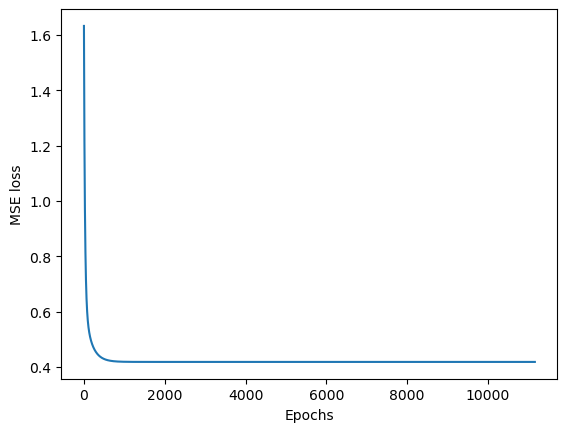

Updated weights after training are [[ 1.06645270e-01 -2.25811487e-01 -4.16247588e-01  2.45334229e-01
   2.05649247e-01 -1.40129683e-02 -8.97608453e-14]]
Predictions are [ 6.76137996e-01  7.24467152e-01  7.95919720e-01  7.64489589e-01
  6.00341761e-01 -5.03629509e-01  4.67754453e-02  6.52824848e-01
 -2.12023985e+00 -2.36002466e-01 -3.24343713e-01  1.11232687e+00
  2.08540065e-01 -8.12244133e-01  5.61048221e-01  9.49707775e-03
  9.39115490e-01 -5.84763528e-02  6.44091290e-01  7.02986795e-01
 -1.98890216e-01  8.45341076e-01 -6.72952496e-01  7.26801232e-01
 -2.29810641e-01 -4.42232447e-01  6.00621528e-01  3.02909895e-01
  3.50768547e-01  5.67145920e-01 -1.81580414e+00  1.87135925e-01
 -5.40210248e-01  6.19260082e-01  6.70444294e-01 -3.52177674e-01
 -5.52343961e-01 -5.24701728e-01  4.70229134e-01  5.81176223e-01
 -1.73511105e+00 -1.58026699e+00 -1.04567708e-01  1.62541205e-01
  7.13032358e-01  1.30388840e-01  6.46974135e-01 -3.54565595e-02
 -1.86539151e+00 -2.09739138e+00  2.80997806e-01 -1

In [5]:
import pandas as pd                                # FOR READING CSV FILE
from sklearn.preprocessing import StandardScaler   # FOR SCALING i.e. PREPROCESSING

ss=StandardScaler()                                # INITIALIZING STANDARD SCALER
data = pd.read_csv('Real estate.csv')              # READING DATA

x = data.drop(['No','Y house price of unit area'], axis=1)  # GETTING X AND SCALING IT 
x=ss.fit_transform(x) 

y = data['Y house price of unit area']                      # GETTING Y ,RESHAPING AND SCALING IT
y=y.to_numpy().reshape(-1,1)                                
y=ss.fit_transform(y)

obj=LINEAR_REGRESSION(x)                                                            # CREATING LINEAR REGRESSION CLASS OBJECT
obj.Train(x,y,learning_rate=0.01,print_loss_after=99)           # TRAINING WITHOUT MAX ITERATIONS
print('Updated weights after training are',obj.Get_Weights())                       # GETTING WEIGHTS 
print('Predictions are',obj.Predict(x).ravel(),'\n\n Actual Y is',y.ravel())        # PREDICTING ON X

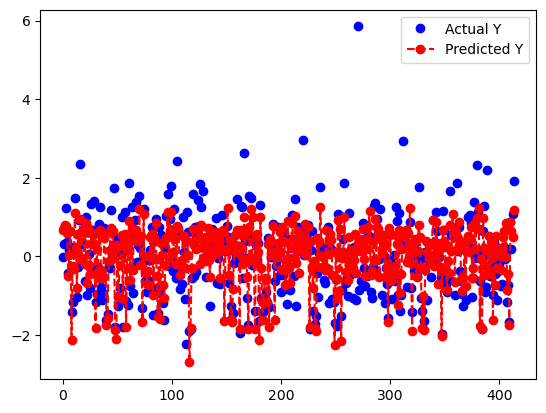

In [6]:
plt.plot(y,'bo')
plt.plot(obj.Predict(x),'ro--')
plt.legend(['Actual Y','Predicted Y'])

In [7]:
y.shape

(414, 1)

***
***
***
# <div align="center"><font color='DARKRED'><b>END</b></font></div>
***
***
***
